# reproduce the coinflip example

In [8]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [9]:
# Prepare the input data
n_tosses = 100
head_fraction = 0.7  # this is our real pi
tosses = np.zeros(n_tosses)
tosses[0:int(n_tosses*head_fraction)] = 1

print(tosses)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [10]:
# set up the model
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    pi = pm.Beta("pi", alpha=10, beta=10)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Bernoulli("Y_obs", p=pi, observed=tosses)

In [11]:
# MCMC sampling
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(draws=1000)

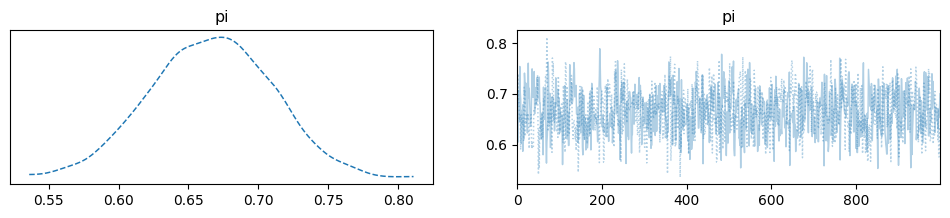

In [12]:
# Analyse the result
az.plot_trace(idata, combined=True);